In [3]:
import numpy as np
import BSMv
import AssetModels

In [16]:
def bond_duration_and_convexity(T, FV, Freq, Coupon, Yield):
    # Calculate the number of periods
    n = int(T * Freq)
    # Adjust coupon rate to payment frequency
    coupon_payment = (Coupon * FV) / Freq
    # Adjust yield to payment frequency
    yield_per_period = Yield / Freq

    # Initialize variables for price, duration, and convexity
    bond_price = 0
    macaulay_duration = 0
    convexity = 0

    # Compute cash flows and add to price, duration, and convexity
    for t in range(1, n + 1):
        cash_flow = coupon_payment if t < n else (coupon_payment + FV)
        discount_factor = (1 + yield_per_period) ** t
        pv = cash_flow / discount_factor

        bond_price += pv
        macaulay_duration += (t/Freq) * pv
        convexity += (t/Freq) * ((t/Freq) + 1) * pv / ((1 + yield_per_period) ** 2)

    # Final adjustments for Macaulay Duration and Convexity
    macaulay_duration /= bond_price
    convexity /= bond_price * (1 + yield_per_period) ** 2

    # Calculate Modified Duration
    modified_duration = macaulay_duration / (1 + yield_per_period)

    return bond_price, macaulay_duration, modified_duration, convexity

# Example Usage:
T = 5           # Time to maturity (years)
FV = 100        # Face value of the bond
Freq = 2         # Semiannual payments
Coupon = 0.06    # Coupon rate (5%)
Yield = 0.09     # Yield to maturity (4%)

price, macaulay_duration, modified_duration, convexity = bond_duration_and_convexity(T, FV, Freq, Coupon, Yield)

print(f"Bond Price: {price:.2f}")
print(f"Macaulay Duration: {macaulay_duration:.4f}")
print(f"Modified Duration: {modified_duration:.4f}")
print(f"Convexity: {convexity:.4f}")

Bond Price: 88.13
Macaulay Duration: 4.3452
Modified Duration: 4.1581
Convexity: 20.9131


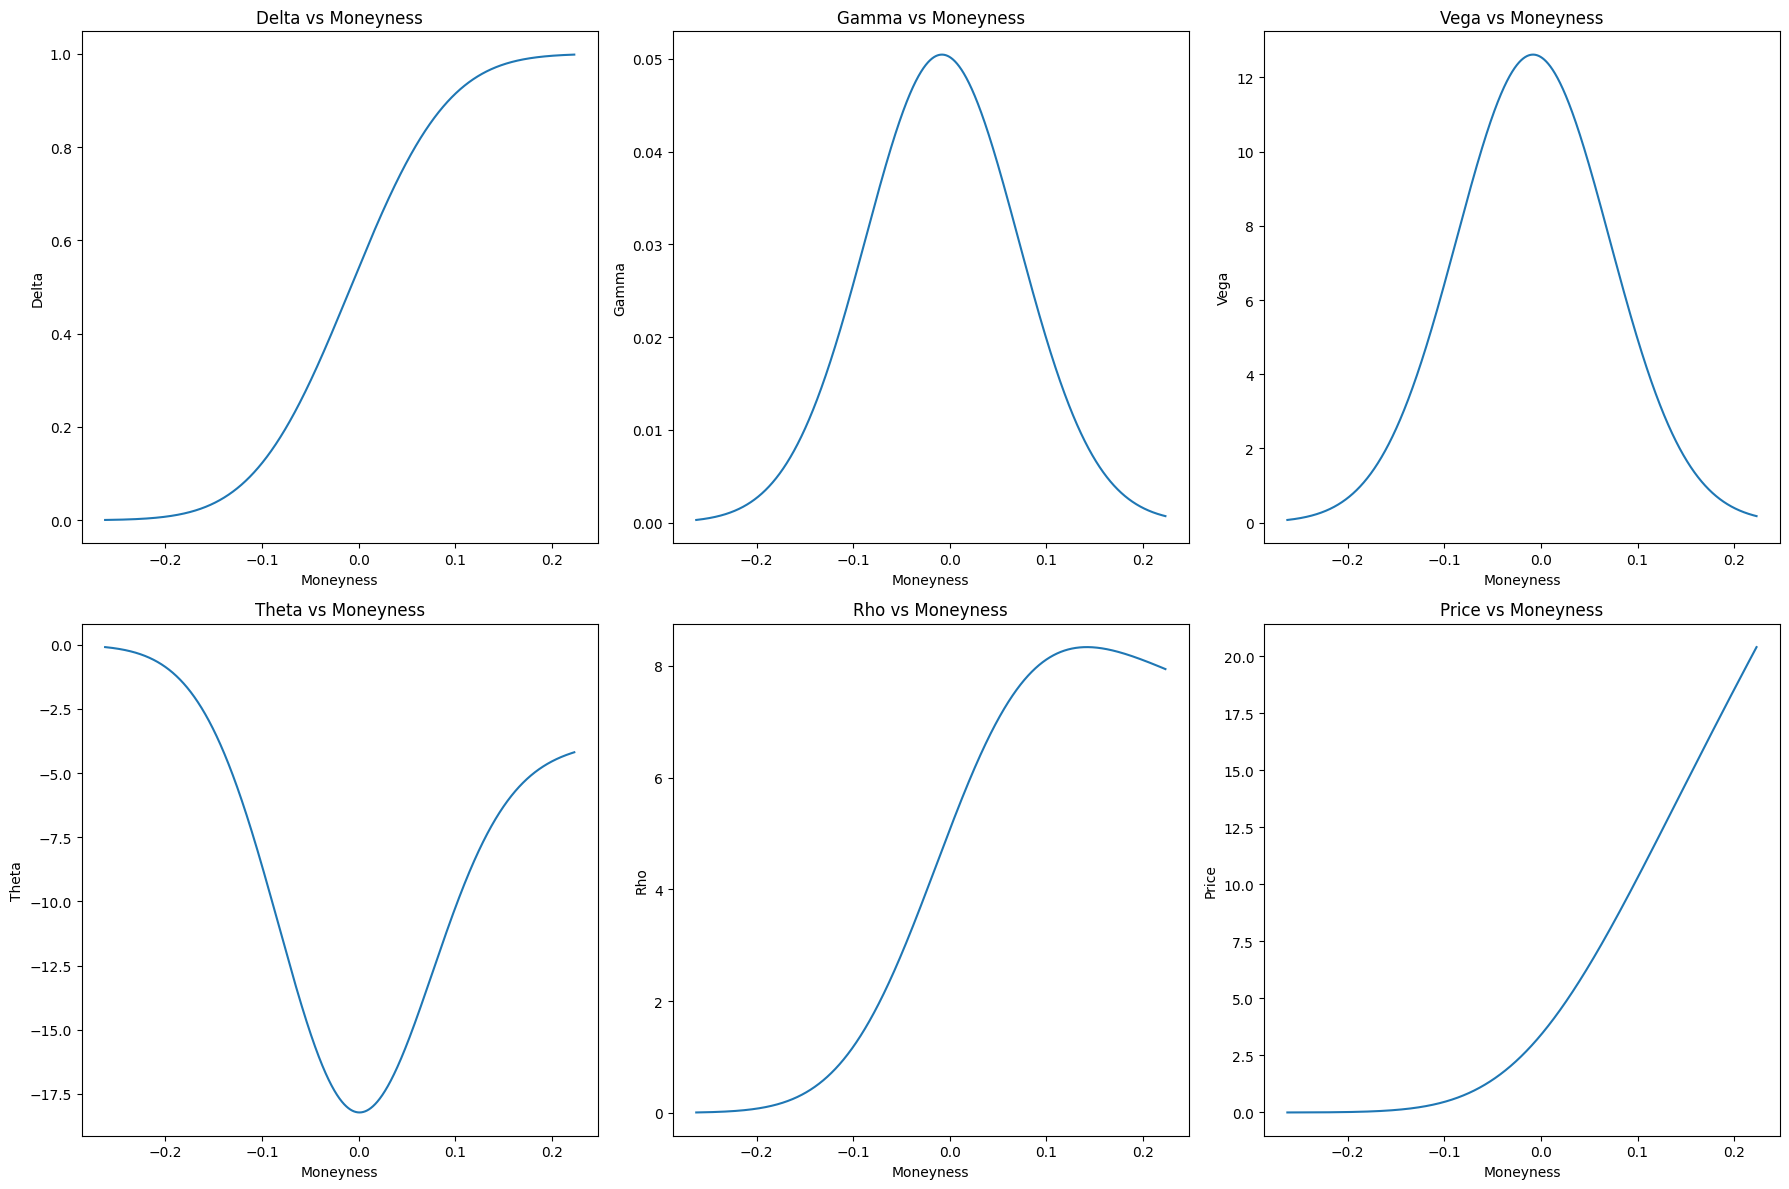

Timing Results:
d1 calculation time: 0.022263 seconds
d2 calculation time: 0.029212 seconds
Delta calculation time: 0.080511 seconds
Gamma calculation time: 0.066778 seconds
Vega calculation time: 0.057767 seconds
Theta calculation time: 0.159067 seconds
Rho calculation time: 0.096562 seconds
Price calculation time: 0.187272 seconds


In [55]:
import seaborn as sns
import pandas as pd
import time

n_sim = 1000000

S0 = np.linspace(100, 100, n_sim)
K = np.linspace(80, 130, n_sim)
T = np.linspace(.1, .1, n_sim)
r = np.linspace(0.05, 0.05, n_sim)
sigma = np.linspace(0.25, 0.25, n_sim)
option_type = "call"
moneyness = np.log(S0/K)

# Timing each function
start_time = time.time()
d1 = BSMv.d1(S0=S0, K=K, T=T, r=r, sigma=sigma)
d1_time = time.time() - start_time

start_time = time.time()
d2 = BSMv.d2(S0=S0, K=K, T=T, r=r, sigma=sigma)
d2_time = time.time() - start_time

start_time = time.time()
delta = BSMv.delta(S0=S0, K=K, T=T, r=r, sigma=sigma, option_type=option_type)
delta_time = time.time() - start_time

start_time = time.time()
gamma = BSMv.gamma(S0=S0, K=K, T=T, r=r, sigma=sigma)
gamma_time = time.time() - start_time

start_time = time.time()
vega = BSMv.vega(S0=S0, K=K, T=T, r=r, sigma=sigma)
vega_time = time.time() - start_time

start_time = time.time()
theta = BSMv.theta(S0=S0, K=K, T=T, r=r, sigma=sigma, option_type=option_type)
theta_time = time.time() - start_time

start_time = time.time()
rhos = BSMv.rho(S0=S0, K=K, T=T, r=r, sigma=sigma, option_type=option_type)
rhos_time = time.time() - start_time

start_time = time.time()
prices = BSMv.price(S0=S0, K=K, T=T, r=r, sigma=sigma, option_type=option_type)
prices_time = time.time() - start_time

# Create a DataFrame for easier plotting with seaborn
data = {
    'Moneyness': moneyness,
    'Delta': delta,
    'Gamma': gamma,
    'Vega': vega,
    'Theta': theta,
    'Rho': rhos,
    'Price': prices
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

sns.lineplot(x='Moneyness', y='Delta', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Delta vs Moneyness')

sns.lineplot(x='Moneyness', y='Gamma', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Gamma vs Moneyness')

sns.lineplot(x='Moneyness', y='Vega', data=df, ax=ax[0, 2])
ax[0, 2].set_title('Vega vs Moneyness')

sns.lineplot(x='Moneyness', y='Theta', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Theta vs Moneyness')

sns.lineplot(x='Moneyness', y='Rho', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Rho vs Moneyness')

sns.lineplot(x='Moneyness', y='Price', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Price vs Moneyness')

plt.tight_layout()
plt.show()

# Print timing results
print(f"Timing Results:")
print(f"d1 calculation time: {d1_time:.6f} seconds")
print(f"d2 calculation time: {d2_time:.6f} seconds")
print(f"Delta calculation time: {delta_time:.6f} seconds")
print(f"Gamma calculation time: {gamma_time:.6f} seconds")
print(f"Vega calculation time: {vega_time:.6f} seconds")
print(f"Theta calculation time: {theta_time:.6f} seconds")
print(f"Rho calculation time: {rhos_time:.6f} seconds")
print(f"Price calculation time: {prices_time:.6f} seconds")

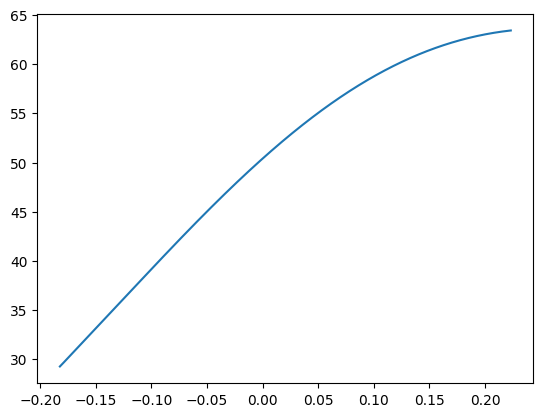

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(moneyness, rhos, label="rho")

plt.show()

In [15]:
(r, rhos)

(array([0.00000e+00, 2.00002e-06, 4.00004e-06, ..., 1.99996e-01,
        1.99998e-01, 2.00000e-01]),
 array([38.40489553, 38.40566262, 38.40642972, ..., 98.24742837,
        98.24755937, 98.24769037]))

In [2]:
size = 10
S0 = np.abs(np.random.normal(loc=100, scale=30, size=size))
K = np.abs(np.random.normal(loc=100, scale=30, size=size))
r = np.abs(np.random.normal(loc=0.05, scale=0.02, size=size))
sigma = np.abs(np.random.normal(loc=0.2, scale=0.1, size=size))
T = 2
dt = 1/252
mu = np.abs(np.random.normal(loc=0.05, scale=0.02, size=size))
option_type = np.random.choice(['call', 'put'], size=size)
option_pos = np.random.uniform(-5000, 5000, size=size)



In [ ]:
S0 = np.linspace(100, 100, 100)
K = np.linspace(100, 100, 100)
r = np.linspace(0.05, 0.05, 100)
sigma = 0.2
sigma_a = 0.3
sigma_h = sigma
option_type = np.array(['call'] * 100)
option_pos = np.array([1.0] * 100)

T = 1
mu = 0.08
dt = 1/252

BSMv.delta_hedge(S0, K, T, r, sigma, option_type, mu, dt, option_pos, sigma_h=sigma_h, sigma_a=sigma_a)

array([ 12.51082471,  14.2825512 ,  57.67930623,  56.45615128,
         4.33258464,  58.73565669,  50.09723011,  51.08057588,
       -23.74263506, -22.14940078,  -8.37319854, -22.35840756,
        -8.54972976,  50.93668089, -24.62485711,  11.52411531,
        47.41910876,  45.75376861, -18.91189496, -25.51033473,
       -31.0836378 ,  45.41612792,  32.27081808,  48.16101494,
       -30.68755843,  -9.76097803,  46.34878284,  51.88588917,
        57.55170764,  52.76911075,  53.81486791, -23.41649059,
        57.22283087, -36.63229111,  10.31228949, -14.74578016,
        54.93451702,  46.29178675,  19.69970299,   2.91526761,
        57.6812792 ,  50.45558461,  -7.87353586, -41.16296207,
        56.21177679,  11.67737906,  11.37349802, -16.45598155,
       -38.14007096,  44.17456996,  58.33172876,  46.61861412,
        52.65764884,  52.59574054, -17.49494556, -36.40696634,
        57.93022924,  58.5775078 , -29.75297149,  58.5317931 ,
        46.9040686 , -23.20583247,  53.15046036, -30.29

In [112]:
S0 

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [55]:
S0[0], K[0], r[0], sigma[0], T[0], option_type[0]

(167.07614140152282,
 64.09111080074916,
 0.05586030652007727,
 0.04960197101251271,
 1.2521319150105665,
 'call')

In [12]:
import time
import numpy as np
import BSM
import BSMv

def calculate_speedup(time1, time2, min_time=1e-10):
    """
    Safely calculate speedup ratio with handling for very small times
    """
    # Ensure we don't divide by zero or very small numbers
    if time2 < min_time or time1 < min_time:
        if abs(time1 - time2) < min_time:
            return 1.0  # Times are effectively equal
        elif time2 < time1:
            return float('inf')  # Second implementation is significantly faster
        else:
            return 0.0  # First implementation is significantly faster
    return time1/time2

def format_speedup(speedup):
    """
    Format speedup ratio for display
    """
    if speedup == float('inf'):
        return "∞x (significantly faster)"
    elif speedup == 0.0:
        return "≈0x (significantly slower)"
    elif abs(speedup - 1.0) < 0.1:
        return "≈1x (similar speed)"
    else:
        return f"{speedup:.2f}x"

# Test parameters
params = {
    'S0': 100,
    'K': 100, 
    'T': 1, 
    'r': 0.05, 
    'sigma': 0.2, 
    'option_type': 'put',
    'mu': 0.08, 
    'dt': 1/252, 
    'option_pos': 1,
    'nsim': 10000
}

print("Running benchmarks...\n")

# Warm up runs (for fair comparison)
try:
    _ = BSM.MC_pnl(**params)
    _ = BSMv.delta_hedge(**params)
except Exception as e:
    print(f"Warning: Warm-up failed: {str(e)}\n")

# Test basic option pricing
print("Testing option pricing...")
try:
    start = time.perf_counter()  # Use perf_counter for higher precision
    price1 = BSM.price(params['S0'], params['K'], params['T'], 
                      params['r'], params['sigma'], params['option_type'])
    time1 = time.perf_counter() - start

    start = time.perf_counter()
    price2 = BSMv.price(params['S0'], params['K'], params['T'], 
                       params['r'], params['sigma'], params['option_type'])
    time2 = time.perf_counter() - start

    print(f"BSM price: {price1:.6f} (Time: {time1:.6f}s)")
    print(f"BSMv price: {price2:.6f} (Time: {time2:.6f}s)")
    print(f"Price difference: {abs(price1 - price2):.10f}")
    print(f"Speedup: {format_speedup(calculate_speedup(time1, time2))}\n")
except Exception as e:
    print(f"Error in price comparison: {str(e)}\n")

# Test Greeks
print("Testing Greeks calculation...")
for greek in ['delta', 'gamma', 'vega', 'theta', 'rho']:
    try:
        if greek in ['gamma', 'vega']:  # These don't need option_type
            start = time.perf_counter()
            g1 = getattr(BSM, greek)(params['S0'], params['K'], params['T'], 
                                   params['r'], params['sigma'])
            time1 = time.perf_counter() - start
            
            start = time.perf_counter()
            g2 = getattr(BSMv, greek)(params['S0'], params['K'], params['T'], 
                                    params['r'], params['sigma'])
            time2 = time.perf_counter() - start
        else:
            start = time.perf_counter()
            g1 = getattr(BSM, greek)(params['S0'], params['K'], params['T'], 
                                   params['r'], params['sigma'], params['option_type'])
            time1 = time.perf_counter() - start
            
            start = time.perf_counter()
            g2 = getattr(BSMv, greek)(params['S0'], params['K'], params['T'], 
                                    params['r'], params['sigma'], params['option_type'])
            time2 = time.perf_counter() - start
        
        print(f"{greek.capitalize()}:")
        print(f"BSM: {g1:.6f} (Time: {time1:.6f}s)")
        print(f"BSMv: {g2:.6f} (Time: {time2:.6f}s)")
        print(f"Difference: {abs(g1 - g2):.10f}")
        print(f"Speedup: {format_speedup(calculate_speedup(time1, time2))}\n")
    except Exception as e:
        print(f"Error in {greek} comparison: {str(e)}\n")

# Test Monte Carlo simulations
print("Testing Monte Carlo simulations...")
try:
    start = time.perf_counter()
    mc1_mean, mc1_std = BSM.MC_pnl(**params)
    time1 = time.perf_counter() - start

    start = time.perf_counter()
    mc2_mean, mc2_std = BSMv.delta_hedge(**params)
    time2 = time.perf_counter() - start

    print("Monte Carlo Results:")
    print(f"BSM: Mean={mc1_mean:.6f}, Std={mc1_std:.6f} (Time: {time1:.4f}s)")
    print(f"BSMv: Mean={mc2_mean:.6f}, Std={mc2_std:.6f} (Time: {time2:.4f}s)")
    print(f"Mean difference: {abs(mc1_mean - mc2_mean):.10f}")
    print(f"Speedup: {format_speedup(calculate_speedup(time1, time2))}\n")
except Exception as e:
    print(f"Error in Monte Carlo comparison: {str(e)}\n")

# Test path generation
print("Testing path generation...")
try:
    start = time.perf_counter()
    paths1 = BSM.MC_pnl(**params)
    time1 = time.perf_counter() - start

    start = time.perf_counter()
    paths2 = BSMv.dh_path(**params)
    time2 = time.perf_counter() - start

    print("Path Generation:")
    print(f"BSM time: {time1:.4f}s")
    print(f"BSMv time: {time2:.4f}s")
    print(f"Mean path difference: {abs(paths1.mean() - paths2.mean()):.10f}")
    print(f"Speedup: {format_speedup(calculate_speedup(time1, time2))}")
except Exception as e:
    print(f"Error in path generation comparison: {str(e)}\n")

Running benchmarks...

Testing option pricing...
BSM price: 5.573526 (Time: 0.000210s)
BSMv price: 5.573526 (Time: 0.000219s)
Price difference: 0.0000000000
Speedup: ≈1x (similar speed)

Testing Greeks calculation...
Delta:
BSM: -0.363169 (Time: 0.000079s)
BSMv: -0.363169 (Time: 0.000079s)
Difference: 0.0000000000
Speedup: ≈1x (similar speed)

Gamma:
BSM: 0.018762 (Time: 0.000062s)
BSMv: 0.018762 (Time: 0.000073s)
Difference: 0.0000000000
Speedup: 0.84x

Vega:
BSM: 37.524035 (Time: 0.000047s)
BSMv: 37.524035 (Time: 0.000065s)
Difference: 0.0000000000
Speedup: 0.72x

Theta:
BSM: -1.657880 (Time: 0.000096s)
BSMv: -1.657880 (Time: 0.000126s)
Difference: 0.0000000000
Speedup: 0.77x

Rho:
BSM: -41.890461 (Time: 0.000040s)
BSMv: -41.890461 (Time: 0.000063s)
Difference: 0.0000000000
Speedup: 0.63x

Testing Monte Carlo simulations...
Error in Monte Carlo comparison: cannot unpack non-iterable numpy.float64 object

Testing path generation...
Path Generation:
BSM time: 2.3058s
BSMv time: 0.2686s

In [ ]:
S0 = 50
K = 50
T = 0.25
r = 0.01
sigma = 0.25

BSM.price(S0=S0, K=K, T=T, r=r, sigma=sigma, option_type='put')

2.4267312109503436

AttributeError: module 'BSM' has no attribute 'gh_path'

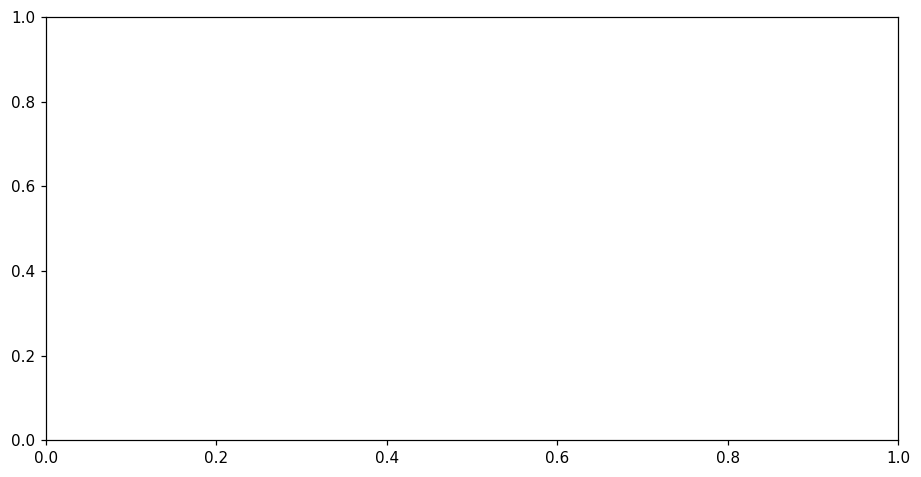

In [3]:
S0 = 50
K = 50
T = 0.25
r = 0.01
sigma = 0.25
mu = 0.1
dt = 1 / 52
option_pos = -1

# path_1 = [50.000000000000, 51.813153485972, 49.893799988468, 52.143065663813, 52.444493063979,
#           51.060414188475, 52.122577086447, 50.863328957800, 53.076047377213, 52.940406029988,
#           53.709575084564, 53.545512192464, 54.291972442098, 54.526849236112]

# p_1 = 0.464045726

# Define colors and create subplots

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=110)

pnl_path_d = BSM.dh_path(S0, K, T, r, sigma, 'call', mu, dt, option_pos)
pnl_path_g = BSM.gh_path(S0, K, T, r, sigma, 'call', mu, dt, option_pos)

sns.lineplot(x=range(len(pnl_path_d)), y=pnl_path_d, ax=ax, label='PnL for Delta-Hedged Portfolio')
sns.lineplot(x=range(len(pnl_path_g)), y=pnl_path_g, ax=ax, label='PnL for Gamma-Hedged Portfolio')

ax.set_title('PnL Path for Given Asset Price Path')
ax.set_xlabel('Time Steps')
ax.set_ylabel('Profit and Loss (PnL)')
ax.legend()

plt.tight_layout()
plt.show()

In [3]:
S0 = 50
K = 50
T = 0.25
r = 0.01
sigma = 0.25
mu = 0.1
dt = 1 / 52
option_pos = -1

# path_i = lognorm_path(S0, mu, sigma, T, dt)

path_1 = [50.000000000000, 51.813153485972, 49.893799988468, 52.143065663813, 52.444493063979,
          51.060414188475, 52.122577086447, 50.863328957800, 53.076047377213, 52.940406029988,
          53.709575084564, 53.545512192464, 54.291972442098, 54.526849236112]

path_2 = [50.000000000, 46.877484261, 45.839925175, 47.570629819, 48.411061270,
          47.418898345, 46.121435969, 49.371731724, 48.076254425, 49.172624670,
          48.996842971, 48.767678766, 45.514914440, 42.483674501]

path_3 = [50.        , 50.29789728, 49.03455896, 49.45131393, 49.39112301,
          49.09167686, 48.44025266, 50.91014286, 48.5341818 , 49.18511317,
          49.23803841, 49.86576605, 49.05485772, 49.39322886]

path_4 = [50.        , 45.72581619, 46.05357967, 45.60033915, 45.12212307,
          45.96680159, 42.9994171 , 40.16006267, 38.91499633, 37.52037855,
          37.26893176, 38.52402944, 38.80665515, 39.50054208]

path_5 = [50.        , 49.55893926, 49.08562067, 49.15510157, 47.69328078,
          48.19108892, 49.86267409, 50.03855983, 51.29997286, 52.2760981 ,
          52.67366252, 54.26384886, 57.59566862, 53.32625924]

test_paths = [path_1, path_2, path_3, path_4, path_5]

p_1 = 0.464045726
p_2 = -0.349931509
p_3 = 1.428691316
p_4 = -0.533851560
p_5 = 0.737285978

ps = [p_1, p_2, p_3, p_4, p_5]

j = 0
for i in range(len(test_paths)):
    pnl = BSM.delta_hedge(S0, K, T, r, sigma, 'call', mu, dt, option_pos, path=test_paths[i])
    print(f'PnL for path {i + 1}: {pnl:.4f} vs. {ps[i]:.4f}')
    if np.abs(ps[i])*.99 < np.abs(pnl) < np.abs(ps[i])*1.01 and pnl/ps[i] > 0:
        j += 1
        if j == len(test_paths):
            print("All prices are correct")

PnL for path 1: 0.4640 vs. 0.4640
PnL for path 2: -0.3499 vs. -0.3499
PnL for path 3: 1.4287 vs. 1.4287
PnL for path 4: -0.5339 vs. -0.5339
PnL for path 5: 0.7373 vs. 0.7373
All prices are correct


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors and create subplots
colors = sns.color_palette("coolwarm", 1)
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=110)

# Plot a single PnL distribution
# Replace `single_pnl_data` with your actual data
sns.histplot(pnl, kde=True, color=colors[0], ax=ax, label='PnL Distribution for single_frequency')
ax.set_title('PnL Distribution for single_frequency')
ax.set_xlabel('PnL')
ax.set_ylabel('Density')
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [1]:
import BSM
import AssetModels
import numpy as np

In [2]:
S0 = 50
K = 50
T = 0.25
r = 0.01
sigma = 0.25
mu = 0.1
dt = 1 / 52
option_pos = -1

path_1 = [50.000000000000, 51.813153485972, 49.893799988468, 52.143065663813, 52.444493063979,
          51.060414188475, 52.122577086447, 50.863328957800, 53.076047377213, 52.940406029988,
          53.709575084564, 53.545512192464, 54.291972442098, 54.526849236112]

p_1 = 0.464045726

display(BSM.delta_hedge(S0, K, T, r, sigma, 'call', mu, dt, option_pos, path=path_1))
# display(BSM.gamma_hedge(S0, K, T, r, sigma, 'call', mu, dt, option_pos, path=path_1))

0.4640457258117143

In [3]:
import pandas as pd

data = pd.read_csv('series_data.csv')
t = np.array(data['Date'])
S = np.array(data['BK.UN.Equity'])

S_ret = np.log(S[1:] / S[:-1])

In [4]:
import VolModels

In [5]:
VolModels.GARCH_model(data=S_ret)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -9933.711655922854
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2


                           AR - GARCH Model Results                           
Dep. Variable:                      y   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9933.71
Distribution:                  Normal   AIC:                          -19857.4
Method:            Maximum Likelihood   BIC:                          -19826.5
                                        No. Observations:                 3569
Date:                Sun, Oct 20 2024   Df Residuals:                     3567
Time:                        00:29:46   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      4.8910e-04  1.212e-04      4.036  5.430e-05 